In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [236]:
df = pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Feature Engineering

### Changing values of Ticket feature from Ticket Number to Count 

In [237]:
df['Ticket_count'] = df.groupby('Ticket')['Ticket'].transform('count')
df = df.drop(columns=['Ticket'])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Ticket_count
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,NaN,S,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C148,C,1


### Remove PassengerId, Name

In [238]:
df = df.drop(columns=['PassengerId','Name'])
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Ticket_count
0,0,3,male,22.0,1,0,7.2500,NaN,S,1
1,1,1,female,38.0,1,0,71.2833,C85,C,1
2,1,3,female,26.0,0,0,7.9250,NaN,S,1
3,1,1,female,35.0,1,0,53.1000,C123,S,2
4,0,3,male,35.0,0,0,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S,1
887,1,1,female,19.0,0,0,30.0000,B42,S,1
888,0,3,female,NaN,1,2,23.4500,NaN,S,2
889,1,1,male,26.0,0,0,30.0000,C148,C,1


### Fill missing values

In [239]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Cabin'].fillna('Unknown', inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# One Hot Encoding

In [240]:
def encode_and_concat(df, columns_to_encode):
    for column in columns_to_encode:
        dummies = pd.get_dummies(df[column], dtype=int, prefix=column)
        df = pd.concat([df, dummies], axis='columns')
        df = df.drop([column, dummies.columns[0]], axis='columns')
    return df

columns_to_encode = [
    'Sex',
    'Cabin',
    'Embarked',
]

df_encoded = encode_and_concat(df, columns_to_encode)
df_encoded

,Survived,Pclass,Age,SibSp,Parch,Fare,Ticket_count,Sex_male,Cabin_A14,Cabin_A16,...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Cabin_Unknown,Embarked_Q,Embarked_S
0,0,3,22.000000,1,0,7.2500,1,1,0,0,...,0,0,0,0,0,0,0,1,0,1
1,1,1,38.000000,1,0,71.2833,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,3,26.000000,0,0,7.9250,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,1,1,35.000000,1,0,53.1000,2,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,3,35.000000,0,0,8.0500,1,1,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,1,1,0,0,...,0,0,0,0,0,0,0,1,0,1
887,1,1,19.000000,0,0,30.0000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
888,0,3,29.699118,1,2,23.4500,2,0,0,0,...,0,0,0,0,0,0,0,1,0,1
889,1,1,26.000000,0,0,30.0000,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


# Correlation Matrix

In [241]:
corr = df_encoded.corr()
corr

,Survived,Pclass,Age,SibSp,Parch,Fare,Ticket_count,Sex_male,Cabin_A14,Cabin_A16,...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Cabin_Unknown,Embarked_Q,Embarked_S
Survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307,0.038247,-0.543351,-2.645647e-02,0.042470,...,-0.037436,0.033803,0.073642,-2.645647e-02,0.060095,0.016040,-0.026456,-0.316912,0.003650,-0.149683
Pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500,-0.002633,0.131900,-5.249602e-02,-0.052496,...,0.039243,-0.021469,-0.021469,2.773375e-02,-0.017519,0.055561,-0.052496,0.725541,0.221009,0.074053
Age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566,-0.221281,0.084153,-8.451677e-18,0.047207,...,-0.028102,-0.070966,-0.003127,3.585838e-17,-0.099278,-0.077253,0.039469,-0.233123,-0.013855,-0.019336
SibSp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651,0.661622,-0.114631,-1.590679e-02,0.014507,...,-0.022508,0.007576,-0.027582,-1.590679e-02,0.063564,-0.001402,-0.015907,0.040460,-0.026354,0.068734
Parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225,0.593076,-0.245489,-1.587758e-02,-0.015878,...,-0.022467,0.068667,-0.027532,-1.587758e-02,0.036410,0.072388,-0.015878,-0.036987,-0.081228,0.060814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cabin_G6,0.016040,0.055561,-0.077253,-0.001402,0.072388,-0.025180,0.010471,-0.091031,-2.250988e-03,-0.002251,...,-0.003185,-0.003903,-0.003903,-2.250988e-03,-0.003185,1.000000,-0.002251,-0.123234,-0.020654,0.041356
Cabin_T,-0.026456,-0.052496,0.039469,-0.015907,-0.015878,0.002224,-0.019414,0.024728,-1.123596e-03,-0.001124,...,-0.001590,-0.001948,-0.001948,-1.123596e-03,-0.001590,-0.002251,1.000000,-0.061513,-0.010310,0.020643
Cabin_Unknown,-0.316912,0.725541,-0.233123,0.040460,-0.036987,-0.482075,-0.028026,0.140391,-6.151319e-02,-0.061513,...,-0.087042,-0.106664,-0.106664,-6.151319e-02,-0.087042,-0.123234,-0.061513,1.000000,0.129572,0.101139
Embarked_Q,0.003650,0.221009,-0.013855,-0.026354,-0.081228,-0.117216,-0.072426,-0.074115,-1.030951e-02,-0.010310,...,-0.014588,-0.017877,-0.017877,1.089863e-01,-0.014588,-0.020654,-0.010310,0.129572,1.000000,-0.499421


### Checking Correlation between survival and other features

In [242]:
target = abs(corr['Survived']) 
target = target.sort_values(ascending=False)
target

Survived         1.000000
Sex_male         0.543351
Pclass           0.338481
Cabin_Unknown    0.316912
Fare             0.257307
                   ...   
Cabin_C78        0.011329
Cabin_C83        0.011329
Cabin_C123       0.011329
Cabin_C22 C26    0.006036
Embarked_Q       0.003650
Name: Survived, Length: 157, dtype: float64

### selecting the features whose correlation coefficient is more than 0.05

In [243]:
target = target[target > 0.05] 
target = target.index[1:] # removing survived row
target

Index(['Sex_male', 'Pclass', 'Cabin_Unknown', 'Fare', 'Embarked_S',
       'Cabin_B96 B98', 'Parch', 'Cabin_E101', 'Cabin_F33', 'Age', 'Cabin_E33',
       'Cabin_B35', 'Cabin_D33', 'Cabin_E24', 'Cabin_E25', 'Cabin_B18',
       'Cabin_D36', 'Cabin_C126', 'Cabin_D20', 'Cabin_C52', 'Cabin_B49',
       'Cabin_C125', 'Cabin_C93', 'Cabin_F4', 'Cabin_B5',
       'Cabin_B57 B59 B63 B66', 'Cabin_E8', 'Cabin_B77', 'Cabin_C92',
       'Cabin_E121', 'Cabin_D35', 'Cabin_D17', 'Cabin_B20', 'Cabin_B28'],
      dtype='object')

In [244]:
 df_encoded = df_encoded[['Sex_male', 'Pclass', 'Cabin_Unknown', 'Fare', 'Embarked_S',
       'Cabin_B96 B98', 'Parch', 'Cabin_E101', 'Cabin_F33', 'Age', 'Cabin_E33',
       'Cabin_B35', 'Cabin_D33', 'Cabin_E24', 'Cabin_E25', 'Cabin_B18',
       'Cabin_D36', 'Cabin_C126', 'Cabin_D20', 'Cabin_C52', 'Cabin_B49',
       'Cabin_C125', 'Cabin_C93', 'Cabin_F4', 'Cabin_B5',
       'Cabin_B57 B59 B63 B66', 'Cabin_E8', 'Cabin_B77', 'Cabin_C92',
       'Cabin_E121', 'Cabin_D35', 'Cabin_D17', 'Cabin_B20', 'Cabin_B28']]
df_encoded

,Sex_male,Pclass,Cabin_Unknown,Fare,Embarked_S,Cabin_B96 B98,Parch,Cabin_E101,Cabin_F33,Age,...,Cabin_B5,Cabin_B57 B59 B63 B66,Cabin_E8,Cabin_B77,Cabin_C92,Cabin_E121,Cabin_D35,Cabin_D17,Cabin_B20,Cabin_B28
0,1,3,1,7.2500,1,0,0,0,0,22.000000,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,71.2833,0,0,0,0,0,38.000000,...,0,0,0,0,0,0,0,0,0,0
2,0,3,1,7.9250,1,0,0,0,0,26.000000,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,53.1000,1,0,0,0,0,35.000000,...,0,0,0,0,0,0,0,0,0,0
4,1,3,1,8.0500,1,0,0,0,0,35.000000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,1,2,1,13.0000,1,0,0,0,0,27.000000,...,0,0,0,0,0,0,0,0,0,0
887,0,1,0,30.0000,1,0,0,0,0,19.000000,...,0,0,0,0,0,0,0,0,0,0
888,0,3,1,23.4500,1,0,2,0,0,29.699118,...,0,0,0,0,0,0,0,0,0,0
889,1,1,0,30.0000,0,0,0,0,0,26.000000,...,0,0,0,0,0,0,0,0,0,0


# Feature Scaling (Z score Normalization)

In [245]:
Y = df.Survived
X = df_encoded.values

In [246]:
# Standardization for X
X_mean = X.mean()
X_std = X.std()

# Replace zero standard deviations with 1 to avoid division by zero
if X_std == 0:
    X_std = 1

X_standardized = (X - X_mean) / X_std

# No need to standardize binary target
Y = Y.values

# Ensure correct shapes
Y = Y.reshape(-1, 1)

# Check the shape of X_standardized and Y
print("Shape of X_standardized:", X_standardized.shape)
print("Shape of Y:", Y.shape)

Shape of X_standardized: (891, 34)
Shape of Y: (891, 1)


# Data Splitting 

In [247]:
# Set the test size ratio
test_ratio = 0.2

# Shuffle the data
num_samples = X_standardized.shape[0]
indices = np.arange(num_samples)
np.random.shuffle(indices)

# Split indices
split_index = int(num_samples * (1 - test_ratio))
train_indices = indices[:split_index]
test_indices = indices[split_index:]

# Split the data
x_train, x_test = X_standardized[train_indices], X_standardized[test_indices]
y_train, y_test = Y[train_indices], Y[test_indices]

y_train = y_train.flatten()
y_test = y_test.flatten()
y_train = y_train.reshape(-1, 1)  # Reshape y_train to (712, 1)
y_test = y_test.reshape(-1, 1) #Reshape y_test to (179,1)


# Check the shapes
print("Shape of X_train:", x_train.shape)
print("Shape of X_test:", x_test.shape)
print("Shape of Y_train:", y_train.shape)
print("Shape of Y_test:", y_test.shape)

Shape of X_train: (712, 34)
Shape of X_test: (179, 34)
Shape of Y_train: (712, 1)
Shape of Y_test: (179, 1)


# Logistic Regression Model

In [248]:
# Stable sigmoid function
def sigmoid(z):
    # Clip values to avoid overflow
    z = np.clip(z, -500, 500)
    return 1.0 / (1.0 + np.exp(-z))

def compute_cost(X, y, weights, bias):
    m = len(y)
    # Forward propagation
    z = np.dot(X, weights) + bias
    h = sigmoid(z)
    
    # Compute cost with numerical stability
    epsilon = 1e-15
    h = np.clip(h, epsilon, 1 - epsilon)
    cost = -np.mean(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

In [249]:
# Initialize parameters
n_features = x_train.shape[1]
weights = np.zeros((n_features, 1))
bias = 0
learning_rate = 0.2  # Reduced learning rate
n_iterations = 10000
cost_history = []

# Training the model

In [250]:
# Training with gradient descent
print("Training the model...")
for i in range(n_iterations):
    # Forward propagation
    z = np.dot(x_train, weights) + bias
    predictions = sigmoid(z)
    
    # Compute gradients
    dw = (1/len(y_train)) * np.dot(x_train.T, (predictions - y_train))
    db = np.mean(predictions - y_train)
    
    # Update parameters
    weights -= learning_rate * dw
    bias -= learning_rate * db
    
    # Calculate and store cost every 100 iterations
    if i % 1000 == 0:
        cost = compute_cost(x_train, y_train, weights, bias)
        cost_history.append(cost)
        if i % 1000 == 0:
            print(f"Iteration {i}, Cost: {cost:.6f}")

Training the model...
Iteration 0, Cost: 0.662079
Iteration 1000, Cost: 0.596874
Iteration 2000, Cost: 0.574815
Iteration 3000, Cost: 0.556703
Iteration 4000, Cost: 0.541759
Iteration 5000, Cost: 0.529355
Iteration 6000, Cost: 0.518990
Iteration 7000, Cost: 0.510272
Iteration 8000, Cost: 0.502888
Iteration 9000, Cost: 0.496596


# Plotting the Learning curve

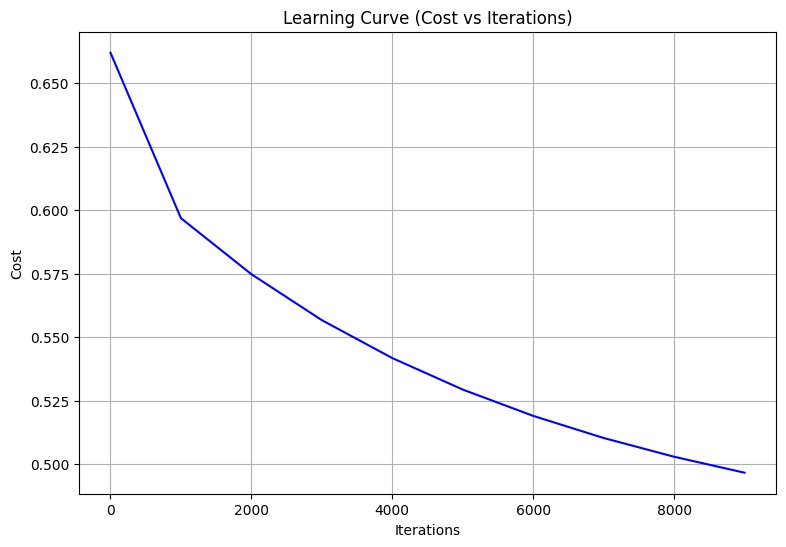

In [251]:
plt.figure(figsize=(9, 6))
plt.plot(range(0, n_iterations, 1000), cost_history, 'b-')
plt.title('Learning Curve (Cost vs Iterations)')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.grid(True)
plt.show()

# Evaluation Metrics and Confusion Matrix

Accuracy: 79.33%
Precision: 0.69


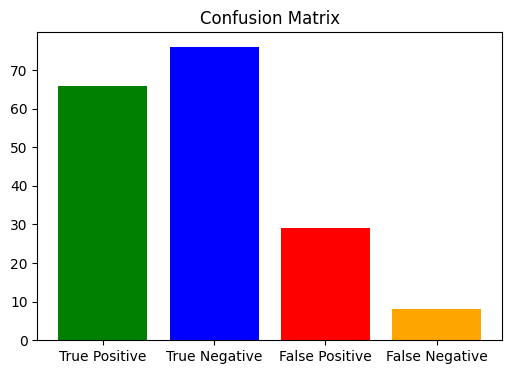

In [252]:
# Prediction function
def predict(x, weights, threshold=0.5):
    return (sigmoid(np.dot(x, weights)) >= threshold).astype(int)

# Evaluate the model on test data
y_pred = predict(x_test, weights)

# Calculate evaluation metrics
def calculate_metrics(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))

    accuracy = (tp + tn) / len(y_true)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0

    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")

    # Confusion matrix visualization
    plt.figure(figsize=(6, 4))
    plt.bar(['True Positive', 'True Negative', 'False Positive', 'False Negative'], [tp, tn, fp, fn], color=['green', 'blue', 'red', 'orange'])
    plt.title("Confusion Matrix")
    plt.show()

    return accuracy
    
# Calculate and print metrics on the test set
accuracy = calculate_metrics(y_test, y_pred)